In [516]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [517]:
# from google.colab import files

In [518]:
# uploaded = files.upload()

In [519]:
# load files
edu = pd.read_csv('education.csv', engine='python')
income = pd.read_csv('income.csv', engine='python')
train = pd.read_csv('police_killings_train.csv', engine='python')
test = pd.read_csv('police_killings_test.csv', engine='python')
poverty = pd.read_csv('poverty.csv', engine='python')
race = pd.read_csv('share_race_by_city.csv', engine='python')

In [520]:
edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [521]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29322 non-null  object
 1   City             29322 non-null  object
 2   Median Income    29271 non-null  object
dtypes: object(3)
memory usage: 687.4+ KB


In [522]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2028 entries, 0 to 2027
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2028 non-null   int64  
 1   name                     2028 non-null   object 
 2   date                     2028 non-null   object 
 3   manner_of_death          2028 non-null   object 
 4   armed                    2022 non-null   object 
 5   age                      1991 non-null   float64
 6   gender                   2028 non-null   object 
 7   race                     1937 non-null   object 
 8   city                     2028 non-null   object 
 9   state                    2028 non-null   object 
 10  signs_of_mental_illness  2028 non-null   bool   
 11  threat_level             2028 non-null   object 
 12  flee                     2001 non-null   object 
 13  body_camera              2028 non-null   bool   
dtypes: bool(2), float64(1), 

In [523]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       507 non-null    int64  
 1   name                     507 non-null    object 
 2   date                     507 non-null    object 
 3   manner_of_death          507 non-null    object 
 4   armed                    504 non-null    object 
 5   age                      467 non-null    float64
 6   gender                   507 non-null    object 
 7   race                     403 non-null    object 
 8   city                     507 non-null    object 
 9   state                    507 non-null    object 
 10  signs_of_mental_illness  507 non-null    bool   
 11  threat_level             507 non-null    object 
 12  flee                     469 non-null    object 
 13  body_camera              507 non-null    bool   
dtypes: bool(2), float64(1), in

In [524]:
poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [525]:
race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [526]:
# column name conformity
race.rename(columns={'Geographic area': 'Geographic Area'},inplace=True)
race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic Area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [527]:
# merge poverty, edu, race, and income based on Geographic Area and City
keys = ['Geographic Area', 'City']
merged = pd.merge(edu, income,on=keys)
merged = pd.merge(merged, poverty, on=keys)
merged = pd.merge(merged, race, on=keys)
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29115 entries, 0 to 29114
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic Area        29115 non-null  object
 1   City                   29115 non-null  object
 2   percent_completed_hs   29115 non-null  object
 3   Median Income          29064 non-null  object
 4   poverty_rate           29115 non-null  object
 5   share_white            29115 non-null  object
 6   share_black            29115 non-null  object
 7   share_native_american  29115 non-null  object
 8   share_asian            29115 non-null  object
 9   share_hispanic         29115 non-null  object
dtypes: object(10)
memory usage: 2.4+ MB


In [528]:
# convert strings to numeric data and set all non-sense data to null
target = merged.iloc[:,2:10]
for columnName in target:
    merged[columnName] = pd.to_numeric(merged[columnName], errors='coerce')
merged.isnull().sum()

Geographic Area             0
City                        0
percent_completed_hs      191
Median Income            1905
poverty_rate              195
share_white                19
share_black                19
share_native_american      19
share_asian                19
share_hispanic             19
dtype: int64

In [529]:
# mean value interpolation: fill missing data with mean value of the state that the data belongs to
merged = merged.fillna(merged.groupby('Geographic Area').transform(lambda x: x.fillna(x.mean())))
merged.isnull().sum()
# merged.dtypes

Geographic Area          0
City                     0
percent_completed_hs     0
Median Income            0
poverty_rate             0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64

In [530]:
# rename columns for later work
merged.rename(columns={'Geographic Area': 'state', 'City': 'city'}, inplace=True)
merged

,state,city,percent_completed_hs,Median Income,poverty_rate,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,21.2,11207.000000,78.8,67.2,30.2,0.0,0.0,1.6
1,AL,Abbeville city,69.1,25615.000000,29.1,54.4,41.4,0.1,1.0,3.1
2,AL,Adamsville city,78.9,42575.000000,25.5,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,81.4,37083.000000,30.7,99.1,0.1,0.0,0.1,0.4
4,AL,Akron town,68.6,21667.000000,42.0,13.2,86.5,0.0,0.0,0.3
...,...,...,...,...,...,...,...,...,...,...
29110,WY,Woods Landing-Jelm CDP,100.0,60874.993421,18.6,95.9,0.0,0.0,2.1,0.0
29111,WY,Worland city,85.6,41523.000000,15.3,89.9,0.3,1.3,0.6,16.6
29112,WY,Wright town,89.2,77114.000000,5.9,94.5,0.1,1.4,0.2,6.2
29113,WY,Yoder town,79.4,37500.000000,5.4,97.4,0.0,0.0,0.0,4.0


### Exploring correlations

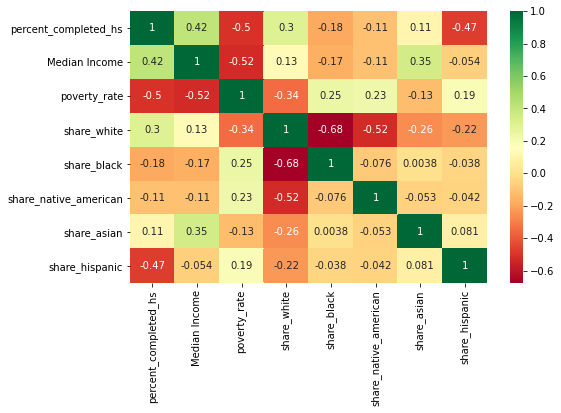

In [531]:
plt.subplots(figsize=(8, 5))
sns.heatmap(merged.drop(['state', 'city'],axis=1).corr(), annot=True, cmap="RdYlGn")
plt.show()

From the heat map above, we can see that
- **percent_completed_hs** has 
  - **moderate positive correlation** (0.48) with **Median Income**
  - **strong negative correlation** (-0.5) with **poverty_rate**
  - **moderate negative correlation** (-0.47) with **share_hispanic**
- **Median Income** has
  - **strong negative correlation** (-0.59) with **poverty_rate**
  - **moderate positive correlation** (0.35) with **share_asian**
- **poverty_rate**
  - **moderate negative correlation** (-0.35) with **share_white**
- **share_white**
  - **strong negative correlation** (-0.68) with **share_black**
  - **strong negative correlation** (-0.52) with **share_native_american**

### Possible explanations:
- percent_completed_hs:
  - community with higher educated rate may have a higher median income
  - community with higher educated rate may have a much lower poverty rate
  - community with higher educated rate may have a lower percentage of hispanic members
- Median Income:
  - community with higher median income may have a much lower poverty rate
  - community with higher median income may have a higher percentage of asian members
- poverty_rate:
  - community with higher poverty rate may have a lower percentage of white members
- share_white:
  - community with higher percentage of white members may imply a much lower percentage of black members
  - community with higher percentage of white members may have a much lower percentage of hispanic members

# EDA

In [532]:
train.isnull().sum()

id                          0
name                        0
date                        0
manner_of_death             0
armed                       6
age                        37
gender                      0
race                       91
city                        0
state                       0
signs_of_mental_illness     0
threat_level                0
flee                       27
body_camera                 0
dtype: int64

In [533]:
# drop rows with missing armed, race data since filling them with random data may affect our prediction
train.dropna(subset=['armed', 'race'], inplace=True) 
train.isnull().sum() 

id                          0
name                        0
date                        0
manner_of_death             0
armed                       0
age                        19
gender                      0
race                        0
city                        0
state                       0
signs_of_mental_illness     0
threat_level                0
flee                       21
body_camera                 0
dtype: int64

In [534]:
# median interpolation for age
train.fillna(value={'age' : train['age'].median()}, inplace=True)
train.isnull().sum() 

id                          0
name                        0
date                        0
manner_of_death             0
armed                       0
age                         0
gender                      0
race                        0
city                        0
state                       0
signs_of_mental_illness     0
threat_level                0
flee                       21
body_camera                 0
dtype: int64

In [535]:
# fill flee with maximum type of flee
train.fillna(value={'flee' : train['flee'].value_counts().idxmax()}, inplace=True)
train.isnull().sum() 

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
dtype: int64

## Dangerous level

### State level

In [536]:
# 10 most dangerous states
train.value_counts(["state"]).head(10)

state
CA       318
TX       179
FL       117
AZ        88
CO        56
NC        55
GA        54
OH        54
OK        54
IL        51
dtype: int64

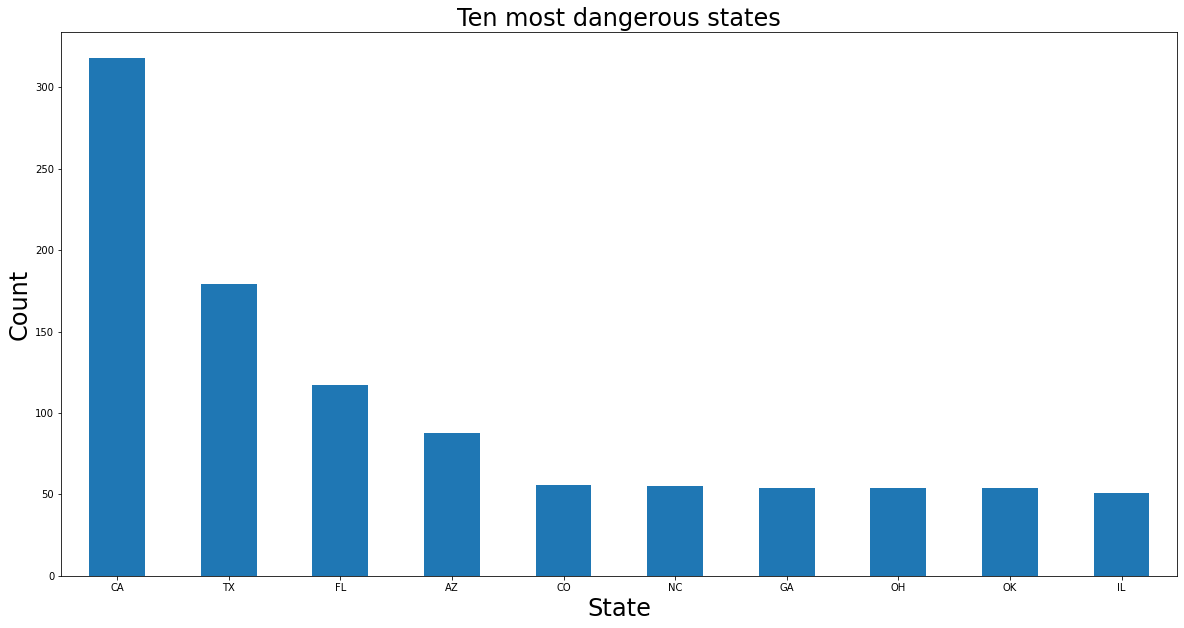

In [537]:
# plot the bar graph
plt.figure(figsize=(20,10))
ax = train.value_counts('state').head(10).plot(kind='bar', rot=0)
ax.set_xlabel("State", fontsize = 24)
ax.set_ylabel("Count", fontsize = 24)
ax.set_title('Ten most dangerous states', fontsize = 24)
plt.show()

### CA (California) has the most fatal police shootings.

### City level

In [538]:
# 10 most dangerous cities
train.value_counts(["state", "city"]).head(10)

state  city        
CA     Los Angeles     31
AZ     Phoenix         22
TX     Houston         22
IL     Chicago         21
NV     Las Vegas       15
FL     Miami           14
TX     San Antonio     14
       Austin          13
IN     Indianapolis    13
OH     Columbus        13
dtype: int64

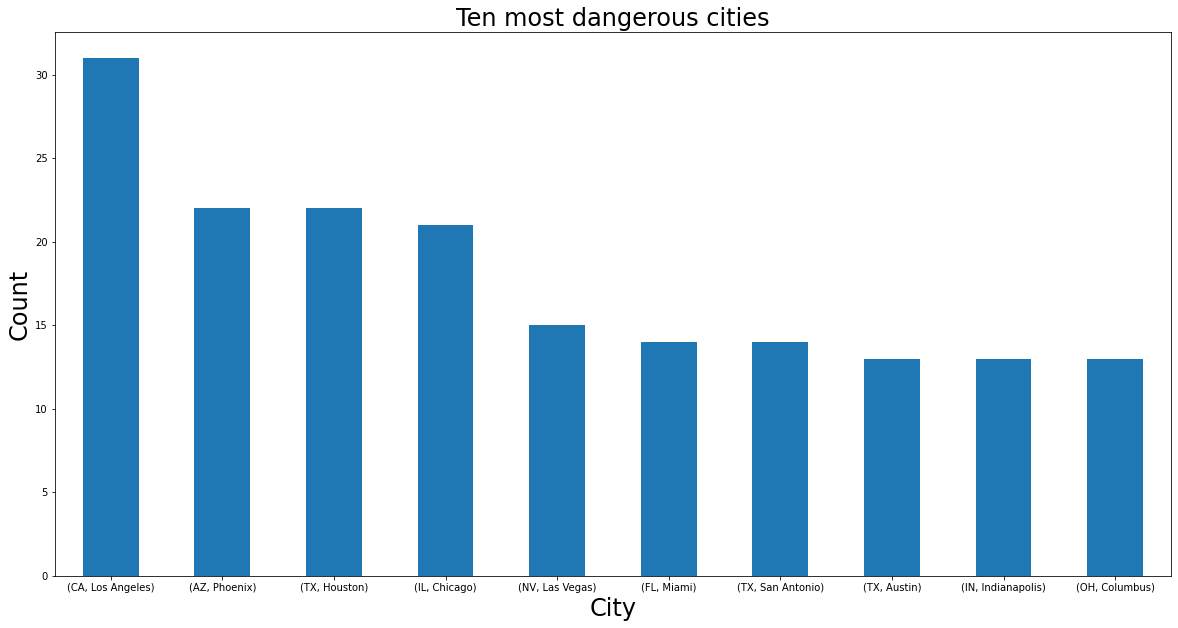

In [539]:
# plot the bar graph
plt.figure(figsize=(20,10))
ax = train.value_counts(['state','city']).head(10).plot(kind='bar', rot=0)
ax.set_xlabel("City", fontsize = 24)
ax.set_ylabel("Count", fontsize = 24)
ax.set_title('Ten most dangerous cities', fontsize = 24)
plt.show()

### From the above graph, we can see that Los Angeles is the most dangerous city in the most dangerous state California, and it is the most dangerous city in the United States.

## Armed

In [540]:
# 10 most common way of being armed
train.value_counts(["armed"]).head(10)

armed         
gun               1063
knife              286
unarmed            148
vehicle            121
undetermined        86
toy weapon          86
machete             15
unknown weapon      11
sword                8
box cutter           7
dtype: int64

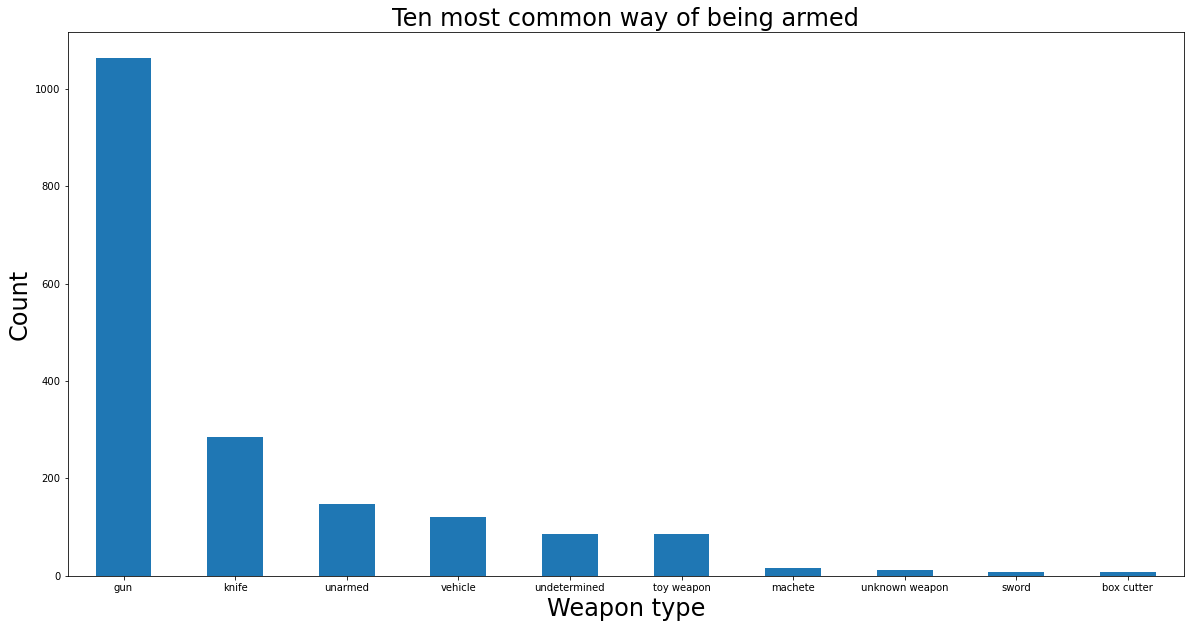

In [541]:
# plot the bar graph
plt.figure(figsize=(20,10))
ax = train.value_counts("armed").head(10).plot(kind='bar', rot=0)
ax.set_xlabel("Weapon type", fontsize = 24)
ax.set_ylabel("Count", fontsize = 24)
ax.set_title('Ten most common way of being armed', fontsize = 24)
plt.show()

### The bar graph of weapon types shows a nice shape of power distribution curve, from which we can see that gun is the most common way of being armed.

## Age Distribution

### By all races

In [542]:
# 10 most listed ages of the victims
train.value_counts(["age"]).head(10)

age 
25.0    76
34.0    75
36.0    75
31.0    74
29.0    73
30.0    61
24.0    60
23.0    59
28.0    58
26.0    57
dtype: int64

### The ten most listed ages of all victims range between 20 and 40. The following histogram displays age distribution of all victims.

In [543]:
train['age'].describe()

count    1932.000000
mean       36.166149
std        12.590792
min         6.000000
25%        26.000000
50%        34.000000
75%        44.250000
max        83.000000
Name: age, dtype: float64

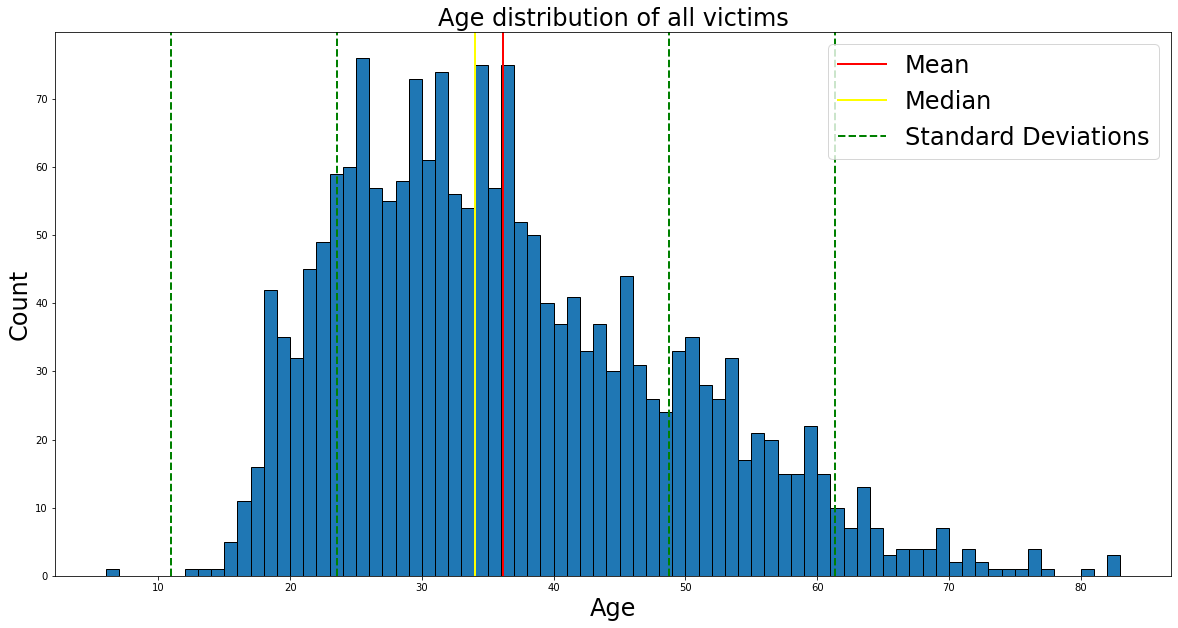

In [544]:
# age distribution of all victims
plt.figure(figsize=(20,10))
plt.hist(train['age'], bins=np.arange(min(train['age']), max(train['age']+1), 1),edgecolor='black')

plt.xlabel('Age', fontsize=24)
plt.ylabel('Count',fontsize=24)
plt.title('Age distribution of all victims', fontsize=24)
# more information
mean = train['age'].mean()
plt.axvline(mean, color='red', linewidth=2, label='Mean')
median = train['age'].median()
plt.axvline(median, color='yellow', linewidth=2, label='Median')
std = train['age'].std()
stdn2 = mean - 2*std
stdn1 = mean - std
stdp1 = mean + std
stdp2 = mean + 2*std
plt.axvline(stdn2, color='green', linewidth=2, label='Standard Deviations', linestyle='--')
plt.axvline(stdn1, color='green', linewidth=2, linestyle='--')
plt.axvline(stdp1, color='green', linewidth=2, linestyle='--')
plt.axvline(stdp2, color='green', linewidth=2, linestyle='--')
plt.legend(fontsize=24)
plt.show()

In [545]:
# skewness
skew = 3*(mean - median)/std 
skew

0.5161269480395437

### The age distribution of all races is moderately skewed right with skewness of 0.5. The median of ages of all victims is about 34, whereas the mean value is about 36. As a result, the distribution is positive skewed. The standard deviation is about 13. Within one standard deviation (13) from the mean, the age ranges between 24 to 49.

## Specific Race

In [546]:
# recorded race types
train['race'].unique()

array(['A', 'W', 'H', 'B', 'O', 'N'], dtype=object)

### Race A (Asian)

In [547]:
race = train[train['race']=='A']
race['age'].describe()

count    31.000000
mean     37.483871
std      11.535080
min      15.000000
25%      29.500000
50%      35.000000
75%      44.000000
max      61.000000
Name: age, dtype: float64

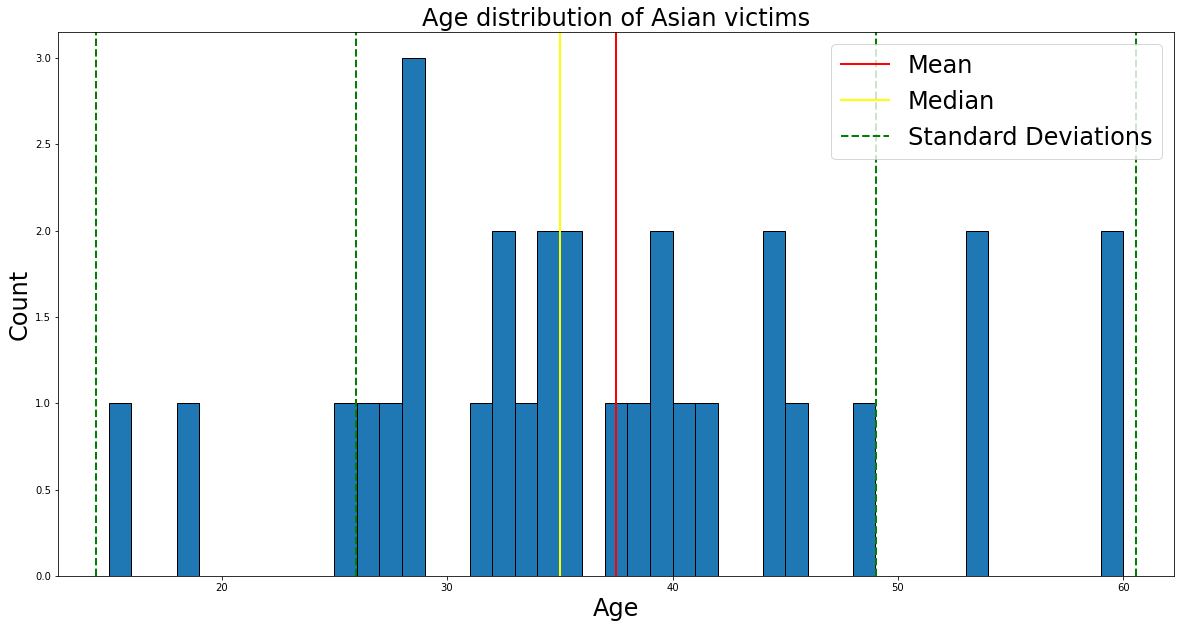

In [548]:
# age distribution of Asian victims
plt.figure(figsize=(20,10))
plt.hist(race['age'], bins=np.arange(min(race['age']), max(race['age']), 1),edgecolor='black')

plt.xlabel('Age', fontsize=24)
plt.ylabel('Count',fontsize=24)
plt.title('Age distribution of Asian victims', fontsize=24)
# more information
mean = race['age'].mean()
plt.axvline(mean, color='red', linewidth=2, label='Mean')
median = race['age'].median()
plt.axvline(median, color='yellow', linewidth=2, label='Median')
std = race['age'].std()
stdn2 = mean - 2*std
stdn1 = mean - std
stdp1 = mean + std
stdp2 = mean + 2*std
plt.axvline(stdn2, color='green', linewidth=2, label='Standard Deviations', linestyle='--')
plt.axvline(stdn1, color='green', linewidth=2, linestyle='--')
plt.axvline(stdp1, color='green', linewidth=2, linestyle='--')
plt.axvline(stdp2, color='green', linewidth=2, linestyle='--')
plt.legend(fontsize=24)
plt.show()

In [549]:
# skewness
skew = 3*(mean - median)/std 
skew

0.6459957862244269

### The ages of Asian victims are loosely distributed between 15 and 60, and it is moderately skewed right with a skewness of 0.6. The mean value is about 37 and is slightly greater than the median age 35. Within one standard deviation (12) from the mean, the majority data range between 26 to 49.

### Race W (White)

In [550]:
race = train[train['race']=='W']
race['age'].describe()

count    995.000000
mean      39.763819
std       13.102578
min        6.000000
25%       30.000000
50%       38.000000
75%       50.000000
max       83.000000
Name: age, dtype: float64

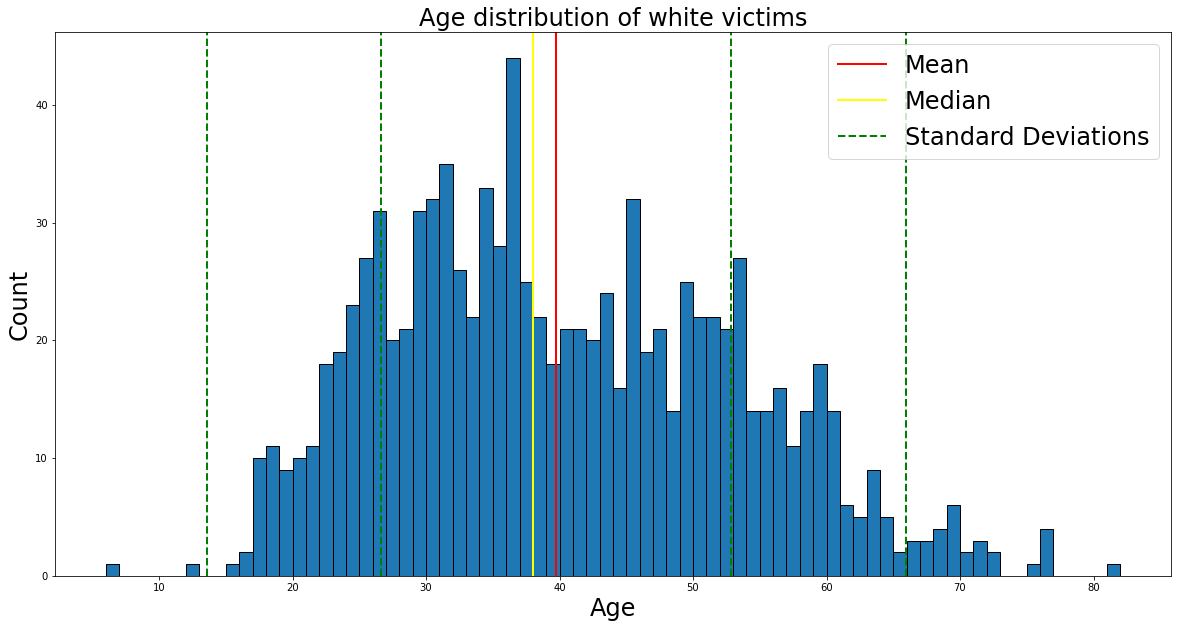

In [551]:
# age distribution of white victims
plt.figure(figsize=(20,10))
plt.hist(race['age'], bins=np.arange(min(race['age']), max(race['age']), 1),edgecolor='black')

plt.xlabel('Age', fontsize=24)
plt.ylabel('Count',fontsize=24)
plt.title('Age distribution of white victims', fontsize=24)
# more information
mean = race['age'].mean()
plt.axvline(mean, color='red', linewidth=2, label='Mean')
median = race['age'].median()
plt.axvline(median, color='yellow', linewidth=2, label='Median')
std = race['age'].std()
stdn2 = mean - 2*std
stdn1 = mean - std
stdp1 = mean + std
stdp2 = mean + 2*std
plt.axvline(stdn2, color='green', linewidth=2, label='Standard Deviations', linestyle='--')
plt.axvline(stdn1, color='green', linewidth=2, linestyle='--')
plt.axvline(stdp1, color='green', linewidth=2, linestyle='--')
plt.axvline(stdp2, color='green', linewidth=2, linestyle='--')
plt.legend(fontsize=24)
plt.show()

In [552]:
# skewness
skew = 3*(mean - median)/std 
skew

0.40384854735971853

### The age distribution of white victims is approximately symmetric with a skewness of 0.4. The mean is 40, which is slightly greater the median 38. Within one standard deviation (13) from the mean, the ages range between 27 and 53.

### Race H (Hispanic)

In [553]:
race = train[train['race']=='H']
race['age'].describe()

count    347.000000
mean      33.103746
std       10.603776
min       14.000000
25%       25.000000
50%       32.000000
75%       39.000000
max       80.000000
Name: age, dtype: float64

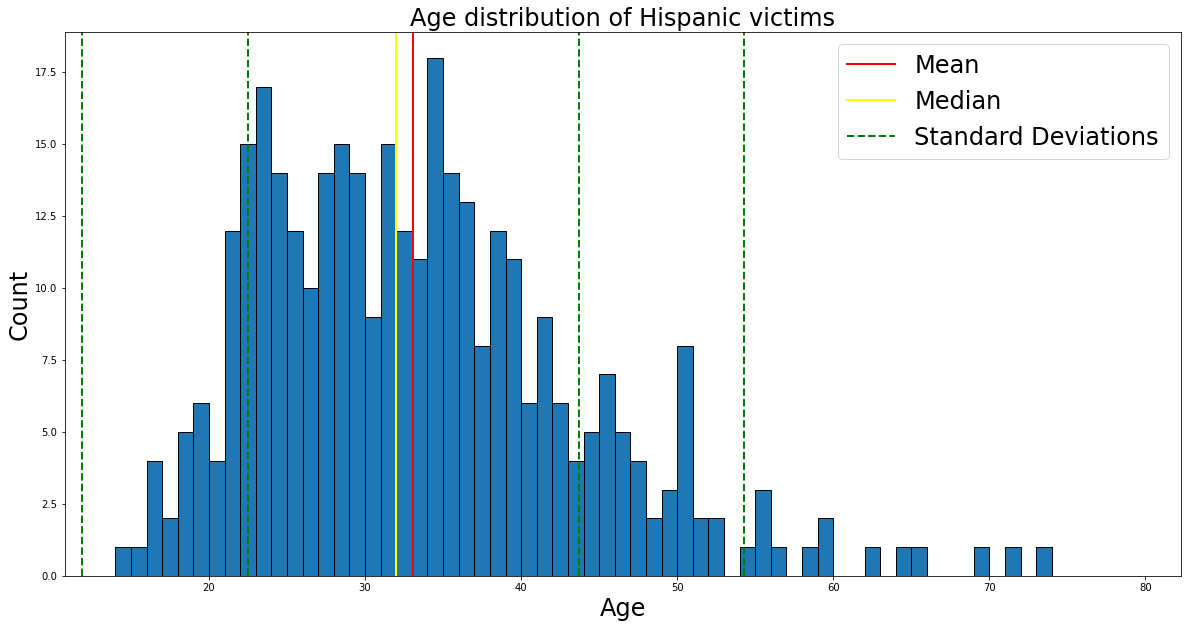

In [554]:
# age distribution of Hispanic victims
plt.figure(figsize=(20,10))
plt.hist(race['age'], bins=np.arange(min(race['age']), max(race['age']), 1),edgecolor='black')

plt.xlabel('Age', fontsize=24)
plt.ylabel('Count',fontsize=24)
plt.title('Age distribution of Hispanic victims', fontsize=24)
# more information
mean = race['age'].mean()
plt.axvline(mean, color='red', linewidth=2, label='Mean')
median = race['age'].median()
plt.axvline(median, color='yellow', linewidth=2, label='Median')
std = race['age'].std()
stdn2 = mean - 2*std
stdn1 = mean - std
stdp1 = mean + std
stdp2 = mean + 2*std
plt.axvline(stdn2, color='green', linewidth=2, label='Standard Deviations', linestyle='--')
plt.axvline(stdn1, color='green', linewidth=2, linestyle='--')
plt.axvline(stdp1, color='green', linewidth=2, linestyle='--')
plt.axvline(stdp2, color='green', linewidth=2, linestyle='--')
plt.legend(fontsize=24)
plt.show()

In [555]:
# skewness
skew = 3*(mean - median)/std 
skew

0.3122698072361164

### The age distribution of hispanic victims looks like a normal distribution. The mean is 33 and is slightly greater the median 32, which results in a skewness of 0.3. Within one standard deviation (11) from the mean, the ages range between 22 and 43.

### Race B (Black)

In [556]:
race = train[train['race']=='B']
race['age'].describe()

count    504.000000
mean      31.533730
std       10.874435
min       13.000000
25%       24.000000
50%       30.000000
75%       37.000000
max       77.000000
Name: age, dtype: float64

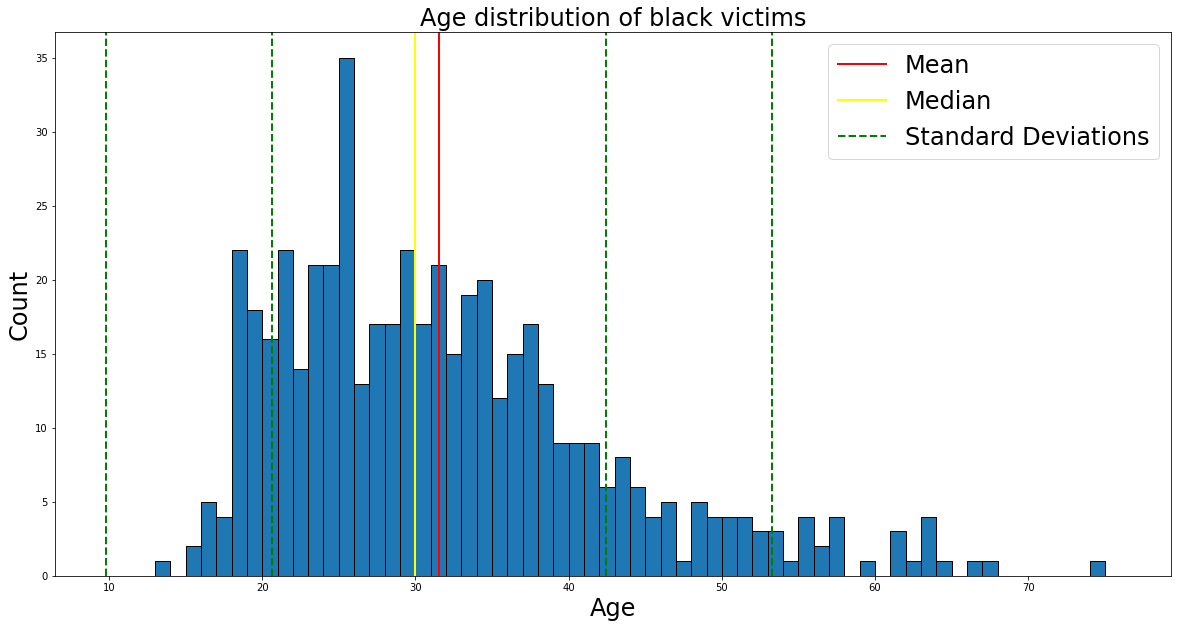

In [557]:
# age distribution of black victims
plt.figure(figsize=(20,10))
plt.hist(race['age'], bins=np.arange(min(race['age']), max(race['age']), 1),edgecolor='black')

plt.xlabel('Age', fontsize=24)
plt.ylabel('Count',fontsize=24)
plt.title('Age distribution of black victims', fontsize=24)
# more information
mean = race['age'].mean()
plt.axvline(mean, color='red', linewidth=2, label='Mean')
median = race['age'].median()
plt.axvline(median, color='yellow', linewidth=2, label='Median')
std = race['age'].std()
stdn2 = mean - 2*std
stdn1 = mean - std
stdp1 = mean + std
stdp2 = mean + 2*std
plt.axvline(stdn2, color='green', linewidth=2, label='Standard Deviations', linestyle='--')
plt.axvline(stdn1, color='green', linewidth=2, linestyle='--')
plt.axvline(stdp1, color='green', linewidth=2, linestyle='--')
plt.axvline(stdp2, color='green', linewidth=2, linestyle='--')
plt.legend(fontsize=24)
plt.show()

In [558]:
# skewness
skew = 3*(mean - median)/std 
skew

0.4231199636775382

### The age distribution of black victims has a moderate positive skewness. The mean is 32 and is slightly greater the median 30. Within one standard deviation (11) from the mean, the ages range between 20 and 42.

### Race O (Other)

In [559]:
race = train[train['race']=='O']
race['age'].describe()

count    28.000000
mean     33.071429
std      11.148588
min      18.000000
25%      26.500000
50%      29.500000
75%      41.250000
max      56.000000
Name: age, dtype: float64

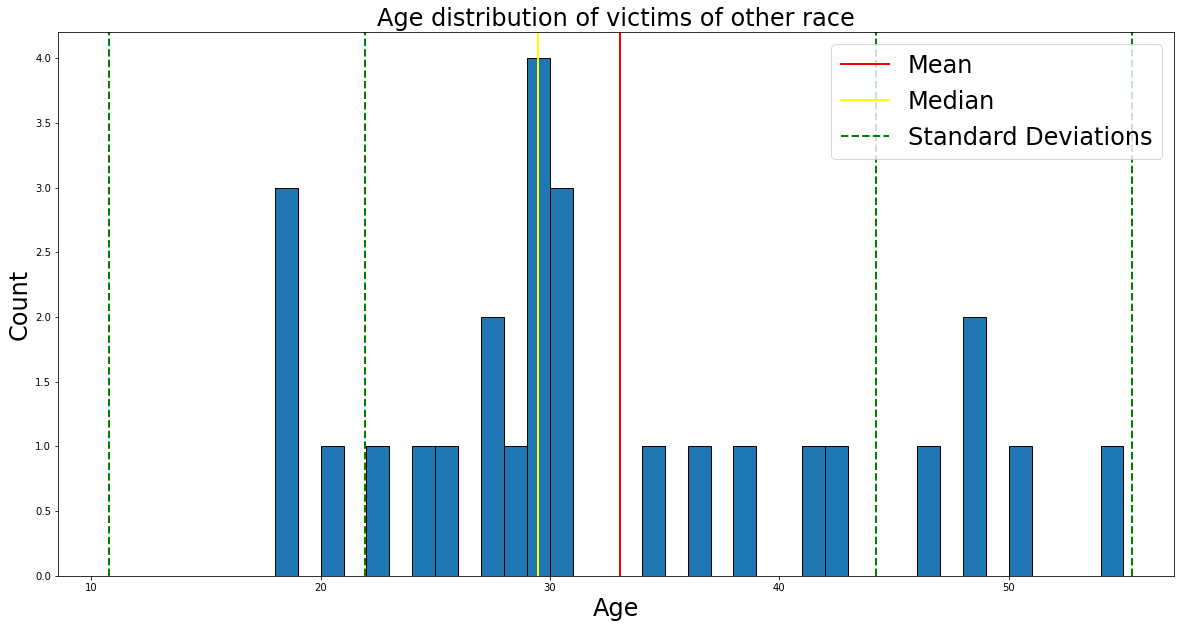

In [560]:
# age distribution of victims of other race
plt.figure(figsize=(20,10))
plt.hist(race['age'], bins=np.arange(min(race['age']), max(race['age']), 1),edgecolor='black')

plt.xlabel('Age', fontsize=24)
plt.ylabel('Count',fontsize=24)
plt.title('Age distribution of victims of other race', fontsize=24)
# more information
mean = race['age'].mean()
plt.axvline(mean, color='red', linewidth=2, label='Mean')
median = race['age'].median()
plt.axvline(median, color='yellow', linewidth=2, label='Median')
std = race['age'].std()
stdn2 = mean - 2*std
stdn1 = mean - std
stdp1 = mean + std
stdp2 = mean + 2*std
plt.axvline(stdn2, color='green', linewidth=2, label='Standard Deviations', linestyle='--')
plt.axvline(stdn1, color='green', linewidth=2, linestyle='--')
plt.axvline(stdp1, color='green', linewidth=2, linestyle='--')
plt.axvline(stdp2, color='green', linewidth=2, linestyle='--')
plt.legend(fontsize=24)
plt.show()

In [561]:
# skewness
skew = 3*(mean - median)/std 
skew

0.9610442243114937

### The ages of victims with other races are loosely distributed with a skewness of 0.96. The mean is 33 and is slightly greater the median 29, which results in a skewness of 0.3. Within one standard deviation (11) from the mean, the ages range between 23 and 44.

### Race N (Native American)

In [562]:
race = train[train['race']=='N']
race['age'].describe()

count    27.000000
mean     31.111111
std       8.266398
min      19.000000
25%      25.000000
50%      31.000000
75%      36.000000
max      49.000000
Name: age, dtype: float64

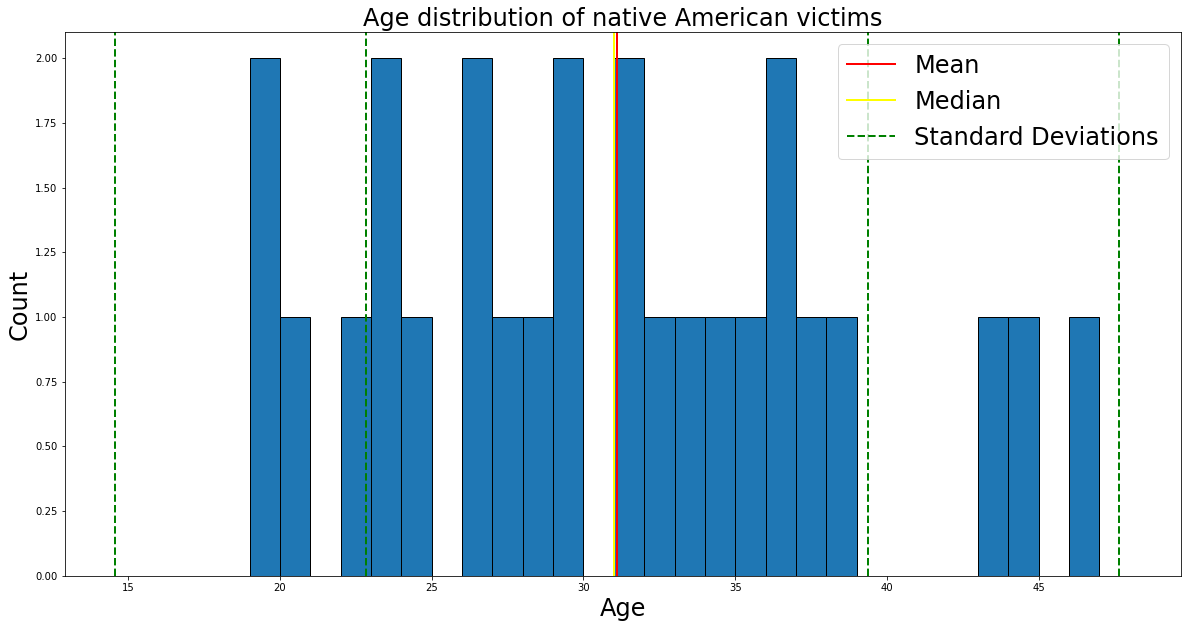

In [563]:
# age distribution of native American victims
plt.figure(figsize=(20,10))
plt.hist(race['age'], bins=np.arange(min(race['age']), max(race['age']), 1),edgecolor='black')

plt.xlabel('Age', fontsize=24)
plt.ylabel('Count',fontsize=24)
plt.title('Age distribution of native American victims', fontsize=24)
# more information
mean = race['age'].mean()
plt.axvline(mean, color='red', linewidth=2, label='Mean')
median = race['age'].median()
plt.axvline(median, color='yellow', linewidth=2, label='Median')
std = race['age'].std()
stdn2 = mean - 2*std
stdn1 = mean - std
stdp1 = mean + std
stdp2 = mean + 2*std
plt.axvline(stdn2, color='green', linewidth=2, label='Standard Deviations', linestyle='--')
plt.axvline(stdn1, color='green', linewidth=2, linestyle='--')
plt.axvline(stdp1, color='green', linewidth=2, linestyle='--')
plt.axvline(stdp2, color='green', linewidth=2, linestyle='--')
plt.legend(fontsize=24)
plt.show()

In [564]:
# skewness
skew = 3*(mean - median)/std 
skew

0.040323891927275445

### The age distribution of native American victims is almost symmetric with a skewness of 0.04. The mean and median are aout 31. Within one standard deviation (8) from the mean, the ages range between 23 and 39.

## Total number of people killed per race

In [565]:
# total number of people killed per race
train.value_counts(["race"])

race
W       995
B       504
H       347
A        31
O        28
N        27
dtype: int64

### Race ratio

In [566]:
# number of people killed in each race / total number of people killed in all races
killed_ratio=train['race'].value_counts(normalize=True) * 100
killed_ratio

W    51.501035
B    26.086957
H    17.960663
A     1.604555
O     1.449275
N     1.397516
Name: race, dtype: float64

### More than half of the victims are white people, more than a quarter are black people, and the number of hispanic victims is about 1/5 of the total. The remaining races (Asian, Other, Native Americans) accounted for less than 5 percent of the victims.

## Number of people killed per race as a proportion of respective races

### According to the estimated race proportion in the U.S. from 2010 through 2019 by [U.S. Census Bureau](https://www.census.gov/quickfacts/fact/table/US/PST045219):
- White: 60.1%
- Hispanic: 18.8%
- Black: 13.4%
- Asian: 5.9%
- Native Americans: 1.3%
- Other (two or more races): 2.8%
### Also, the American population from 2014 to 2017 increases from [320 million to 330 million](https://datacommons.org/tools/timeline#&place=country/USA&statsVar=Count_Person).

In [567]:
# here, we take the median 325 million as the population constant 
p = 325
# white population in millions
wp = 0.601 * p
# hispanic population in millions
hp = 0.188 * p
# black population in millions
bp = 0.134 * p
# Asian population in millions
ap = 0.059 * p
# native American population in millions
np = 0.013 * p
# other race population in millions
op = 0.028 * p
r = ['W', 'B', 'H', 'A', 'O', 'N']
n = train.value_counts('race').tolist()
t = [wp,bp,hp,ap,op,np]
population = pd.DataFrame({'race': r, 'number of killed': n, 'population in millions': t})
population

,race,number of killed,population in millions
0,W,995,195.325
1,B,504,43.550
2,H,347,61.100
3,A,31,19.175
4,O,28,9.100
5,N,27,4.225


In [568]:
# now, we can calculate the proportion of number of victims in respective race population
proportion = pd.DataFrame({'race': r, 'number of people killed per million': population['number of killed']/population['population in millions']})
proportion

,race,number of people killed per million
0,W,5.094074
1,B,11.572905
2,H,5.679214
3,A,1.616688
4,O,3.076923
5,N,6.390533


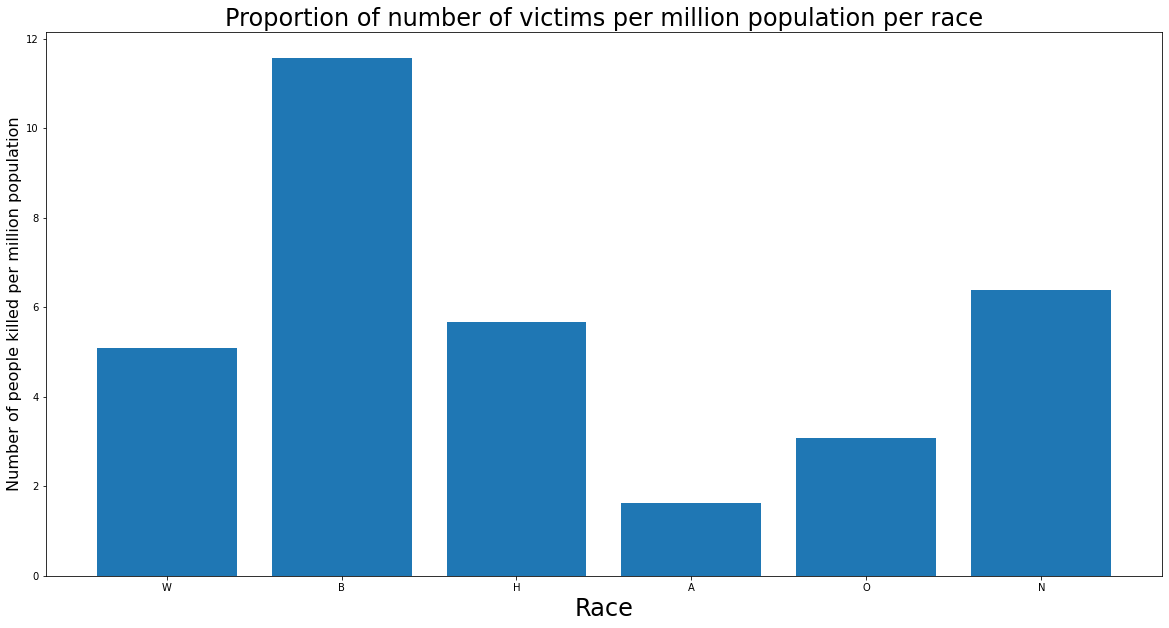

In [569]:
# plot the bar graph
plt.figure(figsize=(20,10))
plt.bar(x=proportion['race'], height=proportion['number of people killed per million'])
plt.xlabel("Race", fontsize = 24)
plt.ylabel("Number of people killed per million population", fontsize = 16)
plt.title('Proportion of number of victims per million population per race', fontsize = 24)
plt.show()

### From the proportion data and the bar graph we can see that
- the number of black victims is twice as much as white victims in a scale of per million population of each race
- the number of native American victims is slightly higher than the number of hispanic victims which is slightly higher than the number of white victims per million population
- the number of victims with other races (two or more races) is about half of the number of white victims per million population
- the proportion of number of Asian victims per million population has the least value

# Machine Learning algorithm


In [570]:
# imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

### Data Modified

In [571]:
train.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [572]:
merged.columns

Index(['state', 'city', 'percent_completed_hs', 'Median Income',
       'poverty_rate', 'share_white', 'share_black', 'share_native_american',
       'share_asian', 'share_hispanic'],
      dtype='object')

In [573]:
for i in range(len(merged)):
  merged['city'][i]=' '.join(merged['city'][i].split()[:-1])
merged.head()

<ipython-input-573-54dc8aaeb259>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['city'][i]=' '.join(merged['city'][i].split()[:-1])


,state,city,percent_completed_hs,Median Income,poverty_rate,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda,21.2,11207.0,78.8,67.2,30.2,0.0,0.0,1.6
1,AL,Abbeville,69.1,25615.0,29.1,54.4,41.4,0.1,1.0,3.1
2,AL,Adamsville,78.9,42575.0,25.5,52.3,44.9,0.5,0.3,2.3
3,AL,Addison,81.4,37083.0,30.7,99.1,0.1,0.0,0.1,0.4
4,AL,Akron,68.6,21667.0,42.0,13.2,86.5,0.0,0.0,0.3


In [574]:
train

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,2256,Jeremy Lopez-Robledo,24/01/17,shot,knife,29.0,M,H,Las Cruces,NM,True,attack,Foot,True
2024,2257,Jonathan David Sper,24/01/17,shot,unarmed,30.0,M,W,Algoma Township,MI,True,attack,Not fleeing,False
2025,2258,Jose Efrain Rodriguez,24/01/17,shot and Tasered,gun,18.0,M,H,Lancaster City,PA,False,attack,Not fleeing,False
2026,2259,Ramon Milanez,24/01/17,shot,gun,32.0,M,H,Kuna,ID,False,attack,Car,False


### Converted String label to number

In [575]:
for (columnName, columnData) in train.iteritems():
  if columnName != "city" and columnName != "state" and columnName != "age":
    summaries = train[columnName].unique()
    summary_mapping = {key:i for key,i in zip(summaries, range(len(summaries)))}
    train[columnName] = [summary_mapping[elem] for elem in train[columnName]]

In [576]:
train

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,0,0,0,0,0,53.0,0,0,Shelton,WA,0,0,0,0
1,1,1,0,0,0,47.0,0,1,Aloha,OR,1,0,0,0
2,2,2,1,1,1,23.0,0,2,Wichita,KS,1,1,0,0
3,3,3,2,0,2,32.0,0,1,San Francisco,CA,0,0,0,0
4,4,4,2,0,3,39.0,0,2,Evans,CO,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,1927,1923,694,0,4,29.0,0,2,Las Cruces,NM,0,0,2,1
2024,1928,1924,694,0,1,30.0,0,1,Algoma Township,MI,0,0,0,0
2025,1929,1925,694,1,0,18.0,0,2,Lancaster City,PA,1,0,0,0
2026,1930,1926,694,0,0,32.0,0,2,Kuna,ID,1,0,1,0


In [577]:
merged

,state,city,percent_completed_hs,Median Income,poverty_rate,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda,21.2,11207.000000,78.8,67.2,30.2,0.0,0.0,1.6
1,AL,Abbeville,69.1,25615.000000,29.1,54.4,41.4,0.1,1.0,3.1
2,AL,Adamsville,78.9,42575.000000,25.5,52.3,44.9,0.5,0.3,2.3
3,AL,Addison,81.4,37083.000000,30.7,99.1,0.1,0.0,0.1,0.4
4,AL,Akron,68.6,21667.000000,42.0,13.2,86.5,0.0,0.0,0.3
...,...,...,...,...,...,...,...,...,...,...
29110,WY,Woods Landing-Jelm,100.0,60874.993421,18.6,95.9,0.0,0.0,2.1,0.0
29111,WY,Worland,85.6,41523.000000,15.3,89.9,0.3,1.3,0.6,16.6
29112,WY,Wright,89.2,77114.000000,5.9,94.5,0.1,1.4,0.2,6.2
29113,WY,Yoder,79.4,37500.000000,5.4,97.4,0.0,0.0,0.0,4.0


In [578]:
for index, row in train.iterrows():

# merged[ merged['city'].str.contains( row['city'] ) and merge['state'] == row ['state'] ]
#row.append(merged.loc[ merged['city'].find(row['city'] != -1 and merge['state'] == row ['state']). )
# result_merge = pd.merge(train,merged,how="left")
# result_merge
# train

SyntaxError: unexpected EOF while parsing (<ipython-input-578-86f74515eee2>, line 7)

### Data Spliting

In [632]:
Y_train = train["race"];
Y_train

0       A
1       W
2       H
3       W
4       H
       ..
2023    H
2024    W
2025    H
2026    H
2027    W
Name: race, Length: 2028, dtype: object

In [633]:
X_train = train.drop(['race'], axis=1)
X_train

,id,name,date,manner_of_death,armed,age,gender,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,2256,Jeremy Lopez-Robledo,24/01/17,shot,knife,29.0,M,Las Cruces,NM,True,attack,Foot,True
2024,2257,Jonathan David Sper,24/01/17,shot,unarmed,30.0,M,Algoma Township,MI,True,attack,Not fleeing,False
2025,2258,Jose Efrain Rodriguez,24/01/17,shot and Tasered,gun,18.0,M,Lancaster City,PA,False,attack,Not fleeing,False
2026,2259,Ramon Milanez,24/01/17,shot,gun,32.0,M,Kuna,ID,False,attack,Car,False


In [634]:
Y_test = test["race"]
Y_test 

0        B
1        W
2        H
3        W
4        B
      ... 
502    NaN
503    NaN
504    NaN
505      B
506      B
Name: race, Length: 507, dtype: object

In [635]:
X_test = test.drop(['race'], axis=1)
X_test

,id,name,date,manner_of_death,armed,age,gender,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,2261,Kevin Darnell Washington,25/01/17,shot,gun,54.0,M,Southaven,MS,False,attack,Not fleeing,False
1,2262,Donovan Paul Scheurich,25/01/17,shot,gun,50.0,M,Millston,WI,True,attack,Not fleeing,True
2,2265,Josue Javier Diaz,26/01/17,shot,gun,28.0,M,Charlotte,NC,False,other,Car,False
3,2266,Kerry Lee Coomer,26/01/17,shot,gun,59.0,M,Overlea,MD,True,attack,Not fleeing,True
4,2267,Deaundre Phillips,26/01/17,shot,undetermined,24.0,M,Atlanta,GA,False,other,Car,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,Kansas City,MO,False,attack,Not fleeing,False
503,2813,TK TK,28/07/17,shot,vehicle,NaN,M,Albuquerque,NM,False,attack,Car,False
504,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,Melba,ID,False,attack,Car,False
505,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,Oshkosh,WI,False,attack,Car,True


In [636]:
X_train.shape, Y_train.shape

((2028, 13), (2028,))

In [637]:
X_test.shape, Y_test.shape

((507, 13), (507,))

### Logistic Regression

In [638]:
LogReg = LogisticRegression()